In [ ]:
!pip install nibabel nilearn matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os


# Loading MRI data

In [ ]:
mri = nib.load("/content/drive/MyDrive/DH602 Brain/brain/1BA001/mr.nii.gz")

In [ ]:
# What is the type of this object?
type(mri)

nibabel.nifti1.Nifti1Image

In [ ]:
mri_data = mri.get_fdata()

In [ ]:
type(mri_data)


numpy.ndarray

In [ ]:
mri_data.shape

(231, 244, 204)

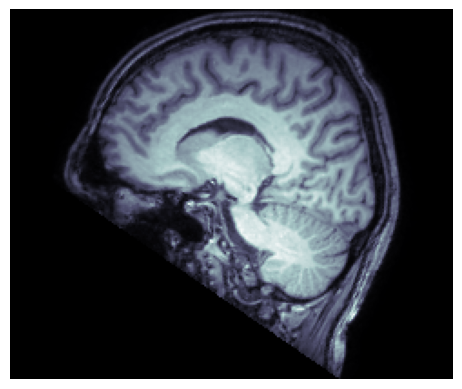

In [ ]:
plt.imshow(ndi.rotate(mri_data[100], 90), cmap='bone')
plt.axis('off')
plt.show()


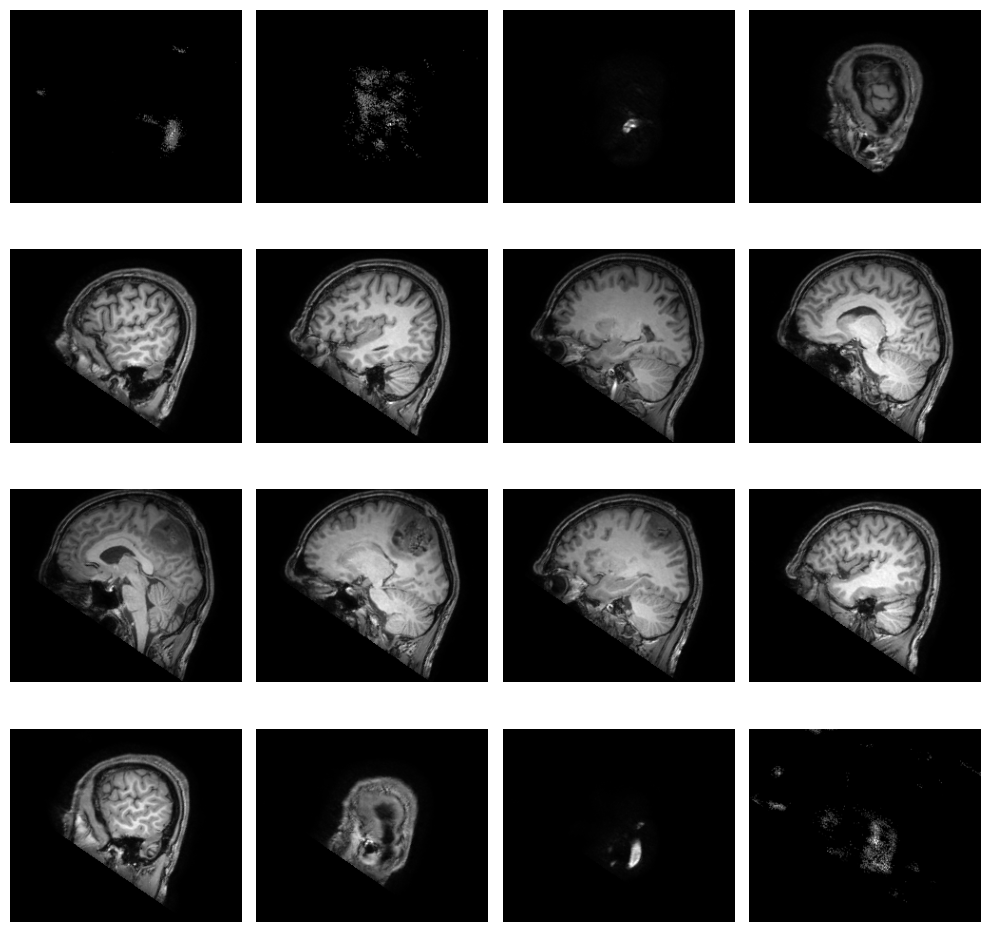

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = mri_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(mri_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
path = '/content/drive/MyDrive/DH602 Brain/brain'

patient_folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
print(patient_folders)

['overview', '1BC087', '1BC088', '1BC085', '1BC082', '1BC090', '1BC083', '1BC084', '1BC081', '1BC094', '1BC086', '1BC080', '1BC070', '1BC066', '1BC076', '1BC073', '1BC075', '1BC077', '1BC067', '1BC074', '1BC068', '1BC065', '1BC050', '1BC051', '1BC052', '1BC053', '1BC054', '1BC056', '1BC062', '1BC058', '1BC064', '1BC063', '1BC049', '1BC048', '1BC036', '1BC035', '1BC039', '1BC041', '1BC037', '1BC047', '1BC046', '1BC038', '1BC034', '1BC023', '1BC028', '1BC019', '1BC020', '1BC021', '1BC022', '1BC027', '1BC025', '1BC017', '1BC031', '1BC014', '1BC001', '1BC008', '1BC006', '1BB200', '1BC004', '1BC010', '1BC009', '1BC007', '1BB205', '1BB198', '1BB189', '1BB179', '1BB175', '1BB184', '1BB182', '1BB152', '1BB177', '1BB173', '1BB171', '1BB151', '1BB145', '1BB109', '1BB111', '1BB102', '1BB096', '1BB095', '1BB098', '1BB100', '1BB099', '1BB091', '1BB090', '1BB066', '1BB073', '1BB072', '1BB079', '1BB075', '1BB071', '1BB076', '1BB085', '1BB083', '1BB082', '1BB062', '1BB050', '1BB059', '1BB044', '1BB048

In [ ]:
patient_folders.remove('overview')
print(patient_folders)

['1BC087', '1BC088', '1BC085', '1BC082', '1BC090', '1BC083', '1BC084', '1BC081', '1BC094', '1BC086', '1BC080', '1BC070', '1BC066', '1BC076', '1BC073', '1BC075', '1BC077', '1BC067', '1BC074', '1BC068', '1BC065', '1BC050', '1BC051', '1BC052', '1BC053', '1BC054', '1BC056', '1BC062', '1BC058', '1BC064', '1BC063', '1BC049', '1BC048', '1BC036', '1BC035', '1BC039', '1BC041', '1BC037', '1BC047', '1BC046', '1BC038', '1BC034', '1BC023', '1BC028', '1BC019', '1BC020', '1BC021', '1BC022', '1BC027', '1BC025', '1BC017', '1BC031', '1BC014', '1BC001', '1BC008', '1BC006', '1BB200', '1BC004', '1BC010', '1BC009', '1BC007', '1BB205', '1BB198', '1BB189', '1BB179', '1BB175', '1BB184', '1BB182', '1BB152', '1BB177', '1BB173', '1BB171', '1BB151', '1BB145', '1BB109', '1BB111', '1BB102', '1BB096', '1BB095', '1BB098', '1BB100', '1BB099', '1BB091', '1BB090', '1BB066', '1BB073', '1BB072', '1BB079', '1BB075', '1BB071', '1BB076', '1BB085', '1BB083', '1BB082', '1BB062', '1BB050', '1BB059', '1BB044', '1BB048', '1BB041',

In [ ]:
import os
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

input_path = "/content/drive/MyDrive/DH602 Brain/brain"
ct_output_path = "/content/drive/MyDrive/DH602 Brain/CT"
mask_output_path = "/content/drive/MyDrive/DH602 Brain/MASK"
mri_output_path = "/content/drive/MyDrive/DH602 Brain/MRI"


for patient in patient_folders:
    patient_path = os.path.join(input_path, patient)
    tags = ['ct', 'mask', 'mr']

    for tag in tags:
        nii_path = os.path.join(patient_path, tag + ".nii.gz")
        nii = nib.load(nii_path)
        nii_data = nii.get_fdata()

        if tag == 'ct':
            output_path = ct_output_path
        elif tag == 'mask':
            output_path = mask_output_path
        else:
            output_path = mri_output_path

        if not os.path.exists(output_path):
            os.makedirs(output_path)


        for i in range(nii_data.shape[1]):
            sagittal_slice = ndi.rotate(nii_data[:, i, :], 90, reshape=False)
            sagittal_output_path = os.path.join(output_path, f'{patient}_S_{i}.png')
            plt.imsave(sagittal_output_path,sagittal_slice, cmap='gray')

        for i in range(nii_data.shape[2]):
            coronal_slice = ndi.rotate(nii_data[:, :, i], 90, reshape=False)
            coronal_output_path = os.path.join(output_path, f'{patient}_C_{i}.png')
            plt.imsave(coronal_output_path,coronal_slice, cmap='gray')

        for i in range(nii_data.shape[0]):
            transversal_slice = ndi.rotate(nii_data[i, :, :], 90, reshape=False)
            transversal_output_path = os.path.join(output_path, f'{patient}_T_{i}.png')
            plt.imsave(transversal_output_path, transversal_slice, cmap='gray')


NameError: name 'patient_folders' is not defined

# Loading CT Scan Data

In [ ]:
ct = nib.load("/home/crimsondawn/602_project/data/1BA001/ct.nii.gz")

In [ ]:
# What is the type of this object?
type(ct)

nibabel.nifti1.Nifti1Image

In [ ]:
ct_data = ct.get_fdata()

In [ ]:
type(ct_data)

numpy.ndarray

In [ ]:
ct_data.shape

(231, 244, 204)

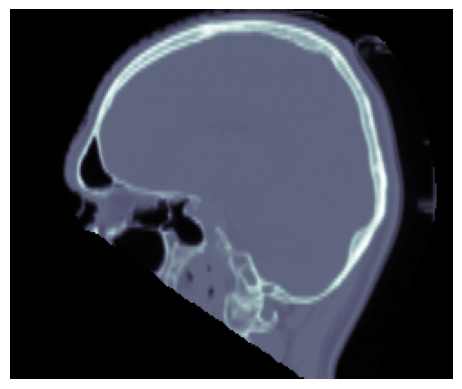

In [ ]:
plt.imshow(ndi.rotate(ct_data[100], 90), cmap='bone')
plt.axis('off')
plt.show()


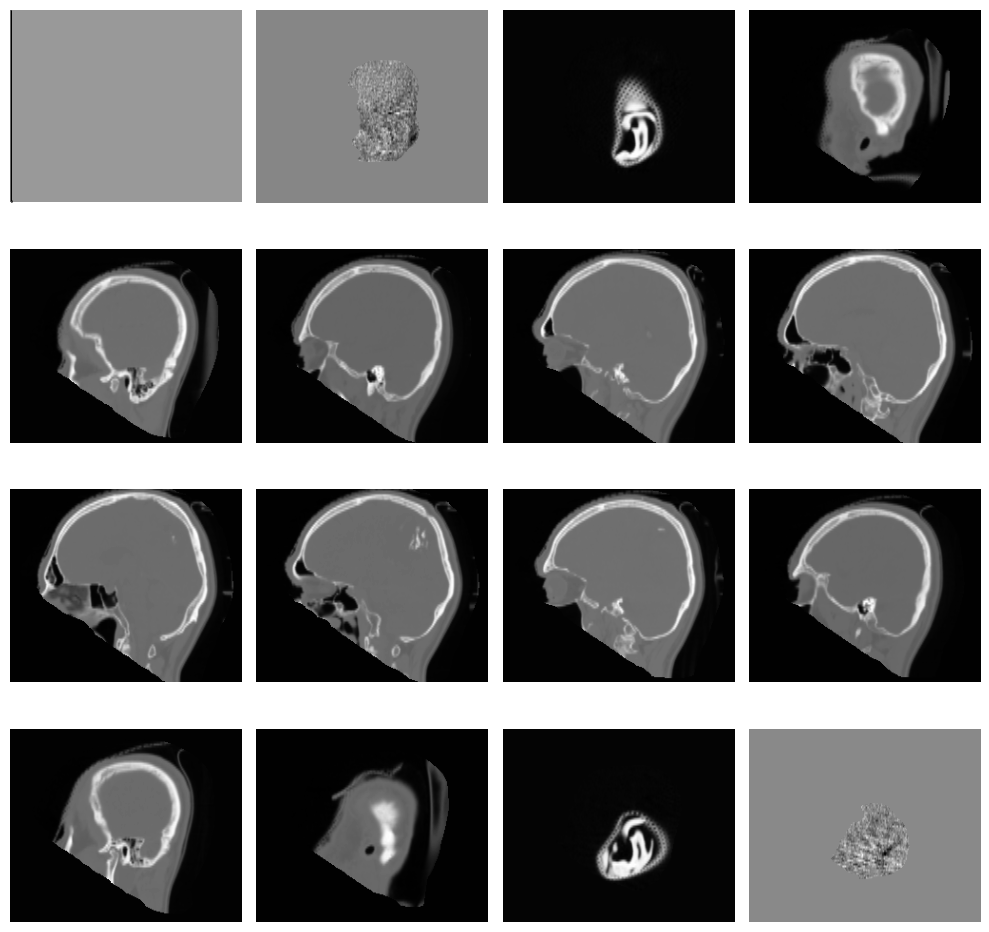

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = ct_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(ct_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
mask = nib.load("/home/crimsondawn/602_project/data/1BA001/mask.nii.gz")

In [ ]:
type(mask)

nibabel.nifti1.Nifti1Image

In [ ]:
mask_data = mask.get_fdata()

In [ ]:
type(mask_data)

numpy.ndarray

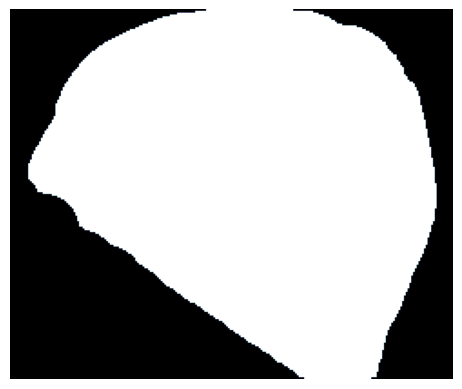

In [ ]:
plt.imshow(ndi.rotate(mask_data[100], 90), cmap='bone')
plt.axis('off')
plt.show()


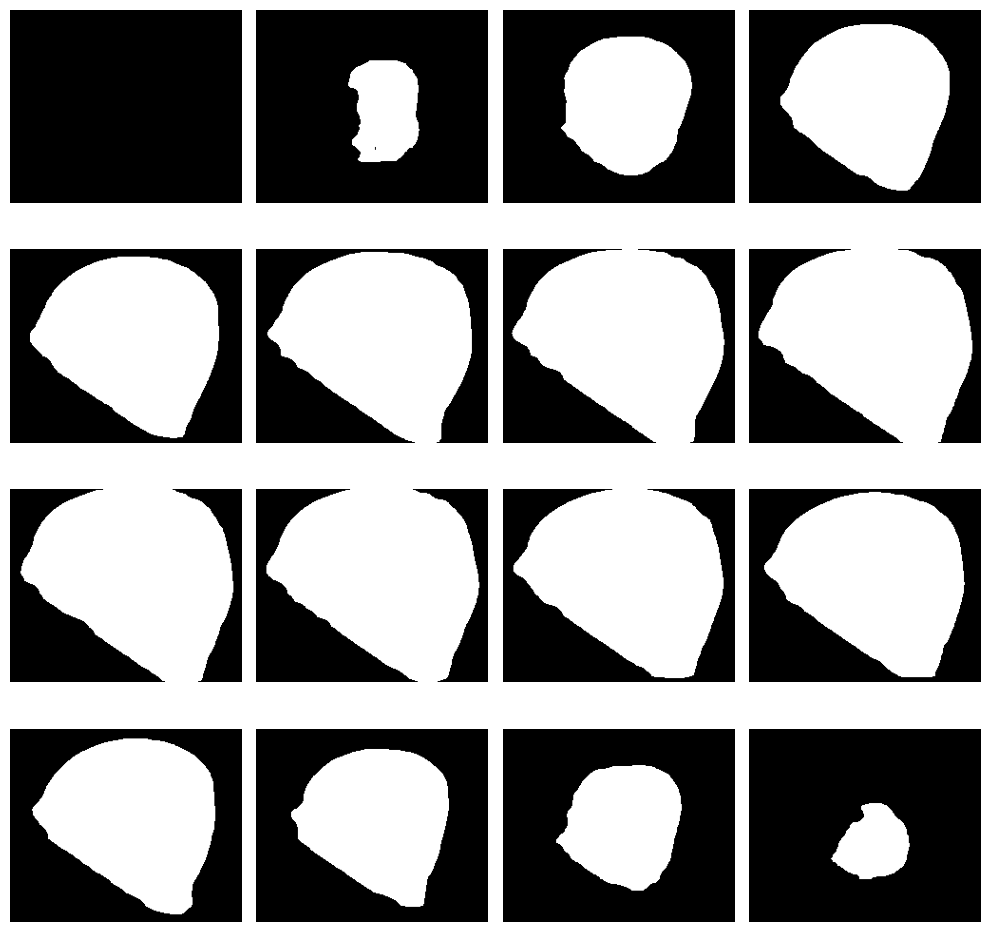

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = mask_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(mask_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()
